Code to load entire dataset into one csv file and perform knn and rf classifier

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

ext = ('.json')
for files in os.listdir():
    if files.endswith(ext):
        atk = pd.read_json(files,lines=True)
        atk.drop(['noise','spd_noise','pos_noise'], inplace=True, axis=1)
        atk1 = pd.DataFrame(atk['pos'].tolist(), columns=['pos-x1', 'pos-y1', 'pos-z'])
        atk1.drop(['pos-z'], inplace=True, axis=1)
        atk2 = pd.DataFrame(atk['spd'].tolist(), columns=['spd-x1', 'spd-y1', 'spd-z'])
        atk2.drop(['spd-z'], inplace=True, axis=1)
        frames1=[atk,atk1,atk2]
        attack=pd.concat(frames1,axis=1)
        attack.drop(['pos','spd'], inplace=True, axis=1)
        bsm = attack[attack["type"] == 3]
        cs = ['pos-x1','pos-y1','spd-x1','spd-y1']
        g= bsm[cs].shift(-1).add_prefix('rec')
        bsm = pd.concat([bsm, g], axis=1).fillna(0).astype(float)
        bsm['attacker']=0
        bsm.loc[bsm["sender"] == 13 , "attacker"] = 8
        bsm.loc[bsm["sender"] == 31 ,"attacker"] = 8
        bsm.loc[bsm["sender"] == 37 ,"attacker"] = 8
        bsm.loc[bsm["sender"] == 49 ,"attacker"] = 8
        bsm.loc[bsm["sender"] == 55 , "attacker"] = 8
        bsm.loc[bsm["sender"] == 67 , "attacker"] = 8
        bsm.loc[bsm["sender"] == 85 , "attacker"] = 8
        bsm.loc[bsm["sender"] == 115 , "attacker"] = 8
        bsm.loc[bsm["sender"] == 127 , "attacker"] = 8
        bsm.loc[bsm["sender"] == 133, "attacker"] = 8
        bsm.drop(['type','rcvTime','sendTime','messageID'], inplace=True, axis=1)
        bsm.to_csv('bsm.csv', mode='a', header=False, index=False)

In [3]:
col_names = ['sender','RSSI','sen-px','sen-py','sen-sx','sen-sy','rec-px','rec-py','rec-sx','rec-sy','attacker']
# load dataset
pi1 = pd.read_csv("bsm1.csv", header=None, names=col_names)
pi2 = pd.read_csv("bsm2.csv", header=None, names=col_names)
pi4 = pd.read_csv("bsm4.csv", header=None, names=col_names)
pi8 = pd.read_csv("bsm8.csv", header=None, names=col_names)
pi= pd.concat([pi1,pi2,pi4,pi8],axis=0)
pi

,sender,RSSI,sen-px,sen-py,sen-sx,sen-sy,rec-px,rec-py,rec-sx,rec-sy,attacker
3,10806.392902,1.080639e+04,13.000000,1079.000000,5.788533e-09,3584.420000,5774.870000,-0.040000,38.910000,49.000000,1
3,10806.456267,1.080646e+04,31.000000,1143.000000,1.958806e-09,3609.910000,5512.990000,2.510000,-29.790000,49.000000,1
3,10807.392893,1.080739e+04,13.000000,1245.000000,3.567850e-09,3584.380000,5813.710000,-0.040000,38.860000,49.000000,1
3,10807.437705,1.080744e+04,7.000000,1269.000000,1.230979e-08,3591.440000,5661.350000,-1.280000,30.760000,49.000000,1
3,10807.456265,1.080746e+04,31.000000,1297.000000,1.502146e-09,3612.420000,5483.160000,2.510000,-29.800000,49.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
3765,49.000000,3.380320e-08,3635.749926,5548.476022,5.326733e+00,-33.837649,3837.580607,5410.671949,5.749213,-36.520569,8
3766,55.000000,2.622288e-08,3837.580607,5410.671949,5.749213e+00,-36.520569,3617.384828,5377.602525,-3.784942,32.796120,8
3767,91.000000,1.067063e-08,3617.384828,5377.602525,-3.784942e+00,32.796120,3598.998476,5603.341292,2.733781,-32.476043,0
3768,73.000000,1.967003e-09,3598.998476,5603.341292,2.733781e+00,-32.476043,3315.202472,5157.263104,-3.431834,29.736476,0


In [4]:
X = pi.iloc[:, :-1].values
y = pi.iloc[:, 10].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2708    0    4    0   20]
 [   1   17    0    0    0]
 [  16    0   59    0    5]
 [   8    0    0   90    2]
 [  83    0    3    0  156]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2732
           1       1.00      0.94      0.97        18
           2       0.89      0.74      0.81        80
           4       1.00      0.90      0.95       100
           8       0.85      0.64      0.73       242

    accuracy                           0.96      3172
   macro avg       0.94      0.84      0.89      3172
weighted avg       0.95      0.96      0.95      3172



In [20]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

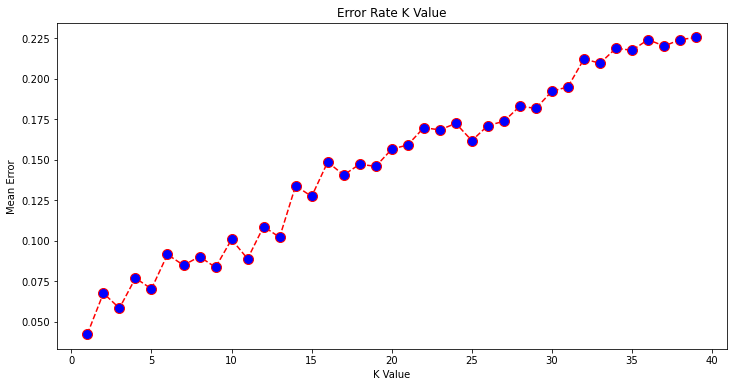

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [33]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.898 (0.023)
